We import all necessary modules from TensorFlow:

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Keras has a built-in IMDb dataset, so first, we load the dataset:

In [2]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


Take a look at the training and testing data we just loaded:

In [3]:
print('Number of training samples: ', len(y_train))
print('Number of positive samples:', sum(y_train))
print('Number of test samples:', len(y_test))

Number of training samples:  25000
Number of positive samples: 12500
Number of test samples: 25000


print training sample each word represented by an integer integer value indicates frequency of the word

In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


We use the word dictionary to map the integer back to the word it represents:

In [5]:
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}
print([index_word.get(i, ' ') for i in X_train[0]])

1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

In [6]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

Next, we analyze the length of each sample (the number of words in each review for example). We do so because all the input sequences to an RNN model must be the same length:

In [7]:
review_lengths = [len(x) for x in X_train]

Plot the distribution of these document lengths, as follows:


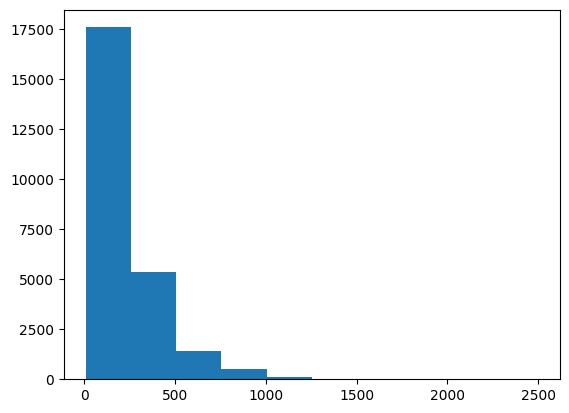

In [8]:
import matplotlib.pyplot as plt
plt.hist(review_lengths, bins=10)
plt.show()

As you can see, the majority of the reviews are around 200 words long. Next, we set 200 as the universal
sequence length by padding shorter reviews with zeros and truncating longer reviews. We use
pad_sequences
function from Keras to accomplish this

In [9]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [10]:
print('X_train shape after padding:', X_train.shape)
print('X_test shape after padding:', X_test.shape)

X_train shape after padding: (25000, 200)
X_test shape after padding: (25000, 200)


In [11]:
tf.random.set_seed(42)
model = models.Sequential()

Since our input sequences are word indices that are equivalent to one-hot encoded vectors, we need to embed them in dense vectors using the Embedding layer from Keras

In [12]:
embedding_size = 32
model.add(layers.Embedding(vocab_size, embedding_size))

After that, we add the output layer, along with a sigmoid activation function,since we are working on a binary
classification problem:

In [13]:
model.add(layers.LSTM(50))
model.add(layers.Dense(1, activation='sigmoid'))

Display the model summary to double-check the layers

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Next, we compile the model with the Adam optimizer and use binary cross-entropy as the optimization target

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

Finally, we train the model with batches of size 64 for three epochs

In [16]:
batch_size = 64
n_epoch = 3
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/3
391/391 [==============================] - 83s 200ms/step - loss: 0.4195 - accuracy: 0.8038 - val_loss: 0.3520 - val_accuracy: 0.8490
Epoch 2/3
391/391 [==============================] - 76s 194ms/step - loss: 0.2641 - accuracy: 0.8946 - val_loss: 0.3340 - val_accuracy: 0.8588
Epoch 3/3
391/391 [==============================] - 69s 177ms/step - loss: 0.2236 - accuracy: 0.9125 - val_loss: 0.3187 - val_accuracy: 0.8684


Using the trained model, we evaluate the classification accuracy on the testing set

In [17]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy:', acc)

Test accuracy: 0.8683599829673767


In [18]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_size))

Initiate a new model and add an embedding layer, two LSTM layers, and an output layer

In [19]:
model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

Here, the first LSTM layer comes with return_sequences=True as we need to feed its entire output sequence to the second LSTM layer. We also add 20% dropout to both LSTM layers to reduce overfitting since we will have more
parameters to train:

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          16600     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 196851 (768.95 KB)
Trainable params: 196851 (768.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Similarly, we compile the model with the Adam optimizer at a 0.003 learning rate

In [21]:
optimizer = optimizers.Adam(lr=0.003)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

Then, we train the stacked model for 7 epochs

In [22]:
n_epoch = 7
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch,
          validation_data=(X_test, y_test))

Epoch 1/7
391/391 [==============================] - 162s 402ms/step - loss: 0.4679 - accuracy: 0.7651 - val_loss: 0.3248 - val_accuracy: 0.8604
Epoch 2/7
391/391 [==============================] - 157s 402ms/step - loss: 0.3098 - accuracy: 0.8714 - val_loss: 0.3651 - val_accuracy: 0.8465
Epoch 3/7
391/391 [==============================] - 157s 402ms/step - loss: 0.2474 - accuracy: 0.9006 - val_loss: 0.3008 - val_accuracy: 0.8732
Epoch 4/7
391/391 [==============================] - 157s 403ms/step - loss: 0.2114 - accuracy: 0.9192 - val_loss: 0.3326 - val_accuracy: 0.8721
Epoch 5/7
391/391 [==============================] - 146s 373ms/step - loss: 0.1873 - accuracy: 0.9288 - val_loss: 0.3879 - val_accuracy: 0.8662
Epoch 6/7
391/391 [==============================] - 156s 398ms/step - loss: 0.1664 - accuracy: 0.9384 - val_loss: 0.3414 - val_accuracy: 0.8646
Epoch 7/7
391/391 [==============================] - 156s 400ms/step - loss: 0.1498 - accuracy: 0.9433 - val_loss: 0.3894 - val_ac

Then, we verify the test accuracy

In [23]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', acc)

Test accuracy with stacked LSTM: 0.8561999797821045


In [24]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


Finally, we plot the learning curves

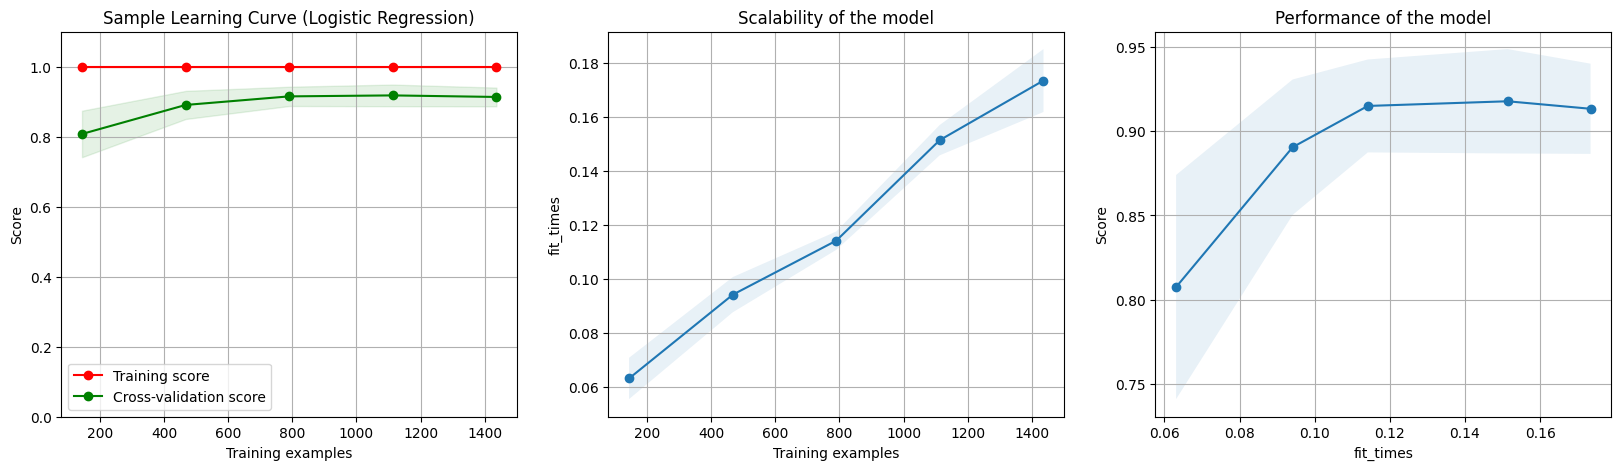

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X, y = digits.data, digits.target


estimator = LogisticRegression()

title = "Sample Learning Curve (Logistic Regression)"

axes = None
ylim = (0.0, 1.1)
cv = 5
n_jobs = -1

vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


plot_learning_curve(
    estimator, title, X, y, axes=axes, ylim=ylim, cv=cv, n_jobs=n_jobs
)

plt.show()
